# 5 Chaos (Bonus)

This notebook does not introduce any new simulation techniques, but rather serves to illustrate some characteristics of chaotic systems. We will use the Lorenz system as an example, given by the three coupled differential equations

$\begin{align}
    x' &= \sigma(-x + y) \\
    y' &= \rho x - y - xz \\
    z' &= xy - \beta z
\end{align}$

with $\sigma, \rho, \beta > 0$, $\sigma > 1 + \beta$, and $x,y,z \in \mathbb{R}$.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# for animation output
from matplotlib.animation import PillowWriter

from matplotlib import rc
rc("text", usetex=True) # Latex font in figures

##### EXERCISE:

Implement a single Runge-Kutta step for the Lorenz system in the function below!

In [2]:
def lorenz_rk(x, y, z, sigma, rho, beta, delta):
    '''
    A single Runge-Kutta step for the Lorenz system.
    
    x, y, z are the state variables,
    sigma, rho, beta the standard model parameters,
    delta is the size of the time step.
    
    Output is the next position in x, y, z coordinates.
    '''
    # slope at initial point
    k1_x = sigma * (y - x)
    k1_y = rho * x - y - x * z
    k1_z = x * y - beta * z
    
    # estimate midpoint with euler step
    xmid = x + 0.5 * delta * k1_x
    ymid = y + 0.5 * delta * k1_y
    zmid = z + 0.5 * delta * k1_z
    
    # slope at estimated midpoint
    k2_x = sigma * (ymid - xmid)
    k2_y = rho * xmid - ymid - xmid * zmid
    k2_z = xmid * ymid - beta * zmid
    
    # re-estimate midpoint
    xmid = x + 0.5 * delta * k2_x
    ymid = y + 0.5 * delta * k2_y
    zmid = z + 0.5 * delta * k2_z
    
    # slope at second midpoint estimate
    k3_x = sigma * (ymid - xmid)
    k3_y = rho * xmid - ymid - xmid * zmid
    k3_z = xmid * ymid - beta * zmid
    
    # estimate endpoint
    xend = x + delta * k3_x
    yend = y + delta * k3_y
    zend = z + delta * k3_z
    
    # slope at endpoint
    k4_x = sigma * (yend - xend)
    k4_y = rho * xend - yend - xend * zend
    k4_z = xend * yend - beta * zend
    
    # next point
    xnew = x + (delta / 6) * (k1_x + 2 * (k2_x + k3_x) + k4_x)
    ynew = y + (delta / 6) * (k1_y + 2 * (k2_y + k3_y) + k4_y)
    znew = z + (delta / 6) * (k1_z + 2 * (k2_z + k3_z) + k4_z)
    
    return xnew, ynew, znew

##### EXERCISE

Simulate $T$ unit time steps, where each is divided into $N$ increments. Inputs should be $T$, $N$, the initial position $x(0)$, $y(0)$, $z(0)$, as well as the model parameters $\sigma$, $\rho$ and $\beta$. Output should be an array where the rows are the state variables, and the columns represent steps in time. We also define the specific timestepping method as an input, so we can later see what happens if we apply different methods on the same system.

In [3]:
def simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, timestep_func):
    
    # define delta and the number of increments
    delta = 1 / N
    TN = T * N
    
    # set up the results array
    result = np.empty((3, TN + 1))
    result[:, 0] = [x0, y0, z0]
    
    # run loop to simulate model and store data in array
    for i in range(TN):
        result[:, i+1] = timestep_func(result[0, i], result[1, i], result[2, i], sigma, rho, beta, delta)
    
    return result       

Next, we can simulate this system with the given values. Feel free to play around with the model parameters and initial values. Results are plotted below, and if the model parameters are chosen appropriately, you should obtain the well-known butterfly shape.

In [4]:
T = 30
N = 100

x0 = 0.1
y0 = 10
z0 = 10

sigma = 10
rho = 28
beta = 8/3

res = simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_rk)

<IPython.core.display.Javascript object>


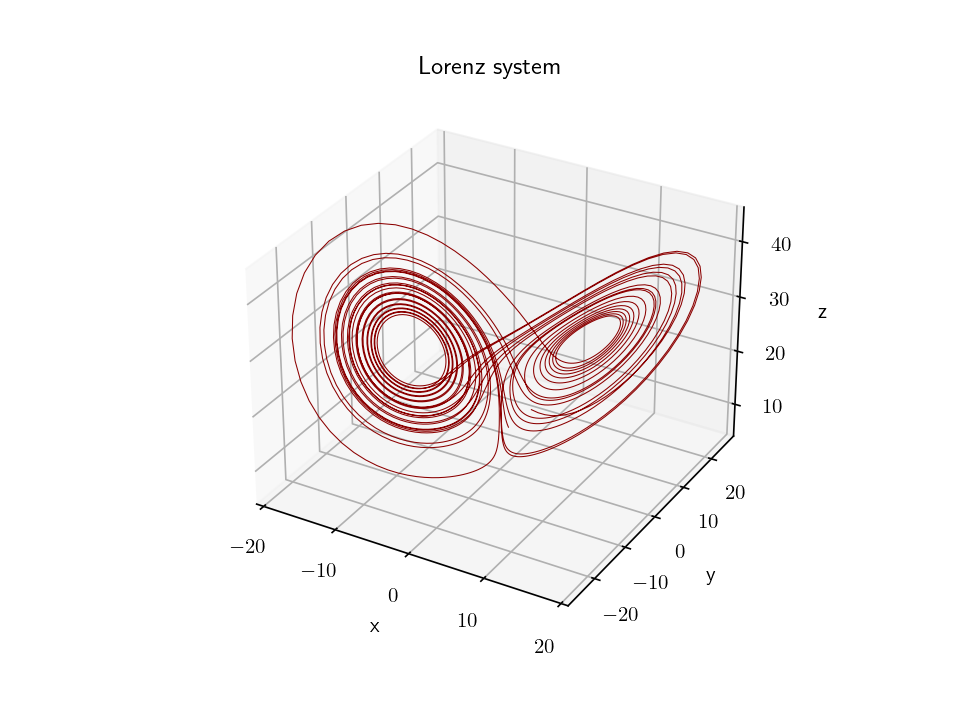

Text(0.5, 0, 'z')

In [5]:
ax = plt.figure().add_subplot(projection='3d')
plt.title("Lorenz system")

plt.plot(res[0], res[1], res[2], lw=0.5, c="darkred")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Now let's explore this model in some more detail. Charateristic to chaotic systems is the strong dependence on initial conditions. I.e. if we start from two points that are very close to each other, the behaviour will soon diverge so far that the two time series will not resemble each other at all. Below, you can find a plot where two trajectories are compared to each other in the $x$ and $z$ dimensions, as well as over time for each of the three variables.

In [4]:
# same as before
T = 25
N = 250

x0 = 0.1
y0 = 10
z0 = 10

sigma = 10
rho = 28
beta = 8/3

res1 = simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_rk)

# now let's change the initial conditions very slightly and run it again
x0 += 0.01
y0 += 0.01
z0 += 0.01

res2= simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_rk)

<IPython.core.display.Javascript object>


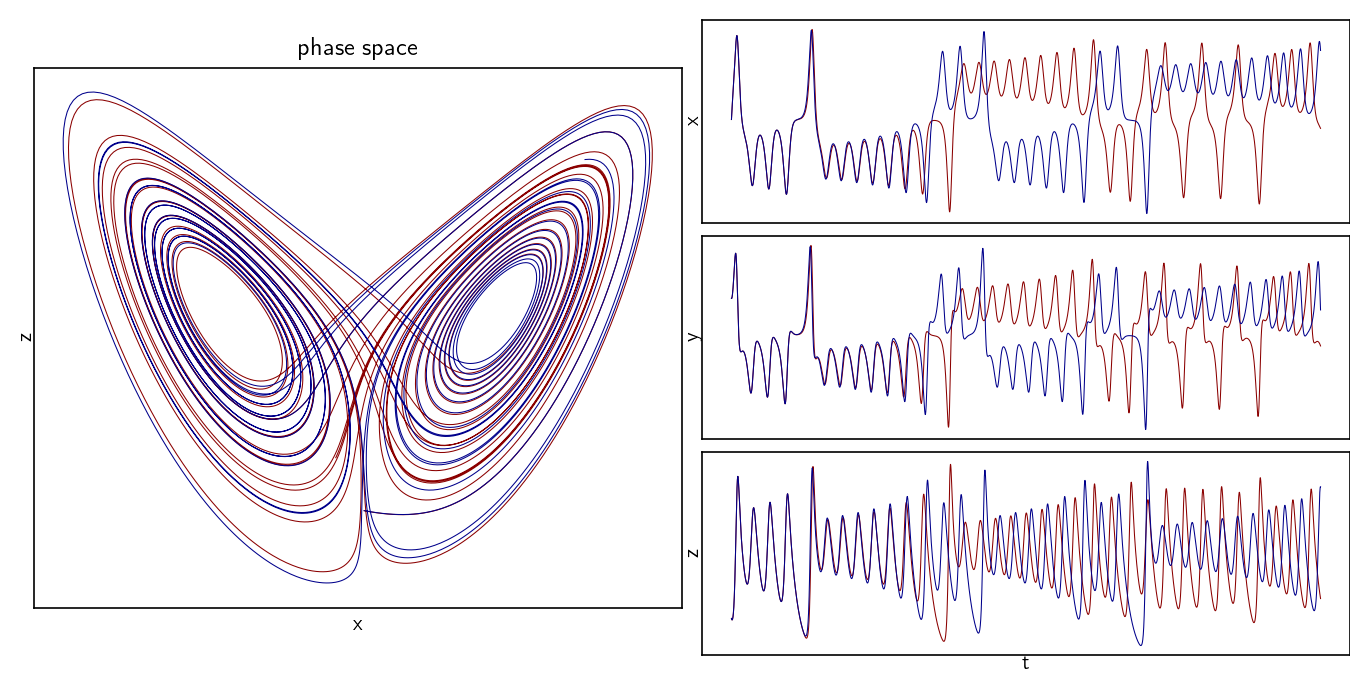

In [7]:
fig = plt.figure(figsize=(9,4.5))

# phase space
ps = fig.add_axes([0.025, 0.1, 0.48, 0.8])

ps.plot(res1[0], res1[2], lw=0.5, c="darkred")
ps.plot(res2[0], res2[2], lw=0.5, c="darkblue")
ps.set_xticks([])
ps.set_yticks([])
ps.set_xlabel("x")
ps.set_ylabel("z", labelpad=-0.5)
ps.set_title("phase space")

# time series
tx = fig.add_axes([0.52, 0.67, 0.48, 0.3])
ty = fig.add_axes([0.52, 0.35, 0.48, 0.3])
tz = fig.add_axes([0.52, 0.03, 0.48, 0.3])

for ax in (tx, ty, tz):
    ax.set_xticks([])
    ax.set_yticks([])
    
tx.set_ylabel("x", labelpad=-0.1)
ty.set_ylabel("y", labelpad=-0.1)
tz.set_ylabel("z", labelpad=-0.1)
tz.set_xlabel("t", labelpad=-0.1)

tx.plot(res1[0], lw=0.5, c="darkred")
tx.plot(res2[0], lw=0.5, c="darkblue")

ty.plot(res1[1], lw=0.5, c="darkred")
ty.plot(res2[1], lw=0.5, c="darkblue")

tz.plot(res1[2], lw=0.5, c="darkred")
tz.plot(res2[2], lw=0.5, c="darkblue")

### Simulation accuracy

Simulating continuous-time sytems in the computer always creates small approximation errors, as computers only work in discrete states. As you can imagine, that has important consequences when we try to simulate chaotic systems. Now we do not only deal with the tiniest errors in the measurement of initial conditions when we try to predict the future, but we also create such small errors through due to our simulation techniques. If we simulate the same systems, with the exact same initial conditions, but use the less accurate explicit Euler scheme, we can hence create the same kind of divergence of "forecasts".

In [8]:
# single euler step
def lorenz_ee(x, y, z, sigma, rho, beta, delta):
    '''
    A single explicit Euler step for the Lorenz system.
    
    x, y, z are the state variables,
    sigma, rho, beta the standard model parameters,
    delta is the size of the time step.
    
    Output is the next position in x, y, z coordinates.
    '''
    # slope at initial point
    xnew =  x + delta * sigma * (y - x)
    ynew = y + delta * (rho * x - y - x * z)
    znew = z + delta * (x * y - beta * z)
    
    return xnew, ynew, znew

And now we can create the same figure as above, but applying two different timestepping schemes to equal initial conditions.

In [9]:
# same as before
T = 25
N = 250

x0 = 0.1
y0 = 10
z0 = 10

sigma = 10
rho = 28
beta = 8/3

res1 = simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_rk)
res3 = simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_ee)

In [10]:
fig = plt.figure(figsize=(9,4.5))

# phase space
ps = fig.add_axes([0.025, 0.1, 0.48, 0.8])

ps.plot(res1[0], res1[2], lw=0.5, c="darkred")
ps.plot(res3[0], res3[2], lw=0.5, c="darkblue")
#ps.set_xticks([])
#ps.set_yticks([])
ps.set_xlabel("x")
ps.set_ylabel("z", labelpad=-0.5)
ps.set_title("phase space")

# time series
tx = fig.add_axes([0.52, 0.67, 0.48, 0.3])
ty = fig.add_axes([0.52, 0.35, 0.48, 0.3])
tz = fig.add_axes([0.52, 0.03, 0.48, 0.3])

for ax in (tx, ty, tz):
    ax.set_xticks([])
    ax.set_yticks([])
    
tx.set_ylabel("x", labelpad=-0.1)
ty.set_ylabel("y", labelpad=-0.1)
tz.set_ylabel("z", labelpad=-0.1)
tz.set_xlabel("t", labelpad=-0.1)

tx.plot(res1[0], lw=0.5, c="darkred")
tx.plot(res3[0], lw=0.5, c="darkblue")

ty.plot(res1[1], lw=0.5, c="darkred")
ty.plot(res3[1], lw=0.5, c="darkblue")

tz.plot(res1[2], lw=0.5, c="darkred")
tz.plot(res3[2], lw=0.5, c="darkblue")

<IPython.core.display.Javascript object>

Just as slight differences in initial conditions, the choice of simulation techniques can also lead to widely varying predictions after a short time!

### Divergence animation

Finally, we can animate this figure to really portray the time dimension in this divergence process. We will again use the slightly altered initial conditions, but apply the same timestepping procedure in both cases. 

*Note that creating animated figures with so many datapoints is quite computationally intensive and might therefore take some time to finish.*

In [10]:
# same as before, but larger time steps
# and shorter time period (less memory intensive)
T = 25
N = 80

x0 = 0.1
y0 = 10
z0 = 10

sigma = 10
rho = 28
beta = 8/3

res1 = simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_rk)

# now let's change the initial conditions very slightly and run it again
x0 += 0.01
y0 += 0.01
z0 += 0.01

res2= simulate_lorenz(x0, y0, z0, sigma, rho, beta, T, N, lorenz_rk)

<IPython.core.display.Javascript object>


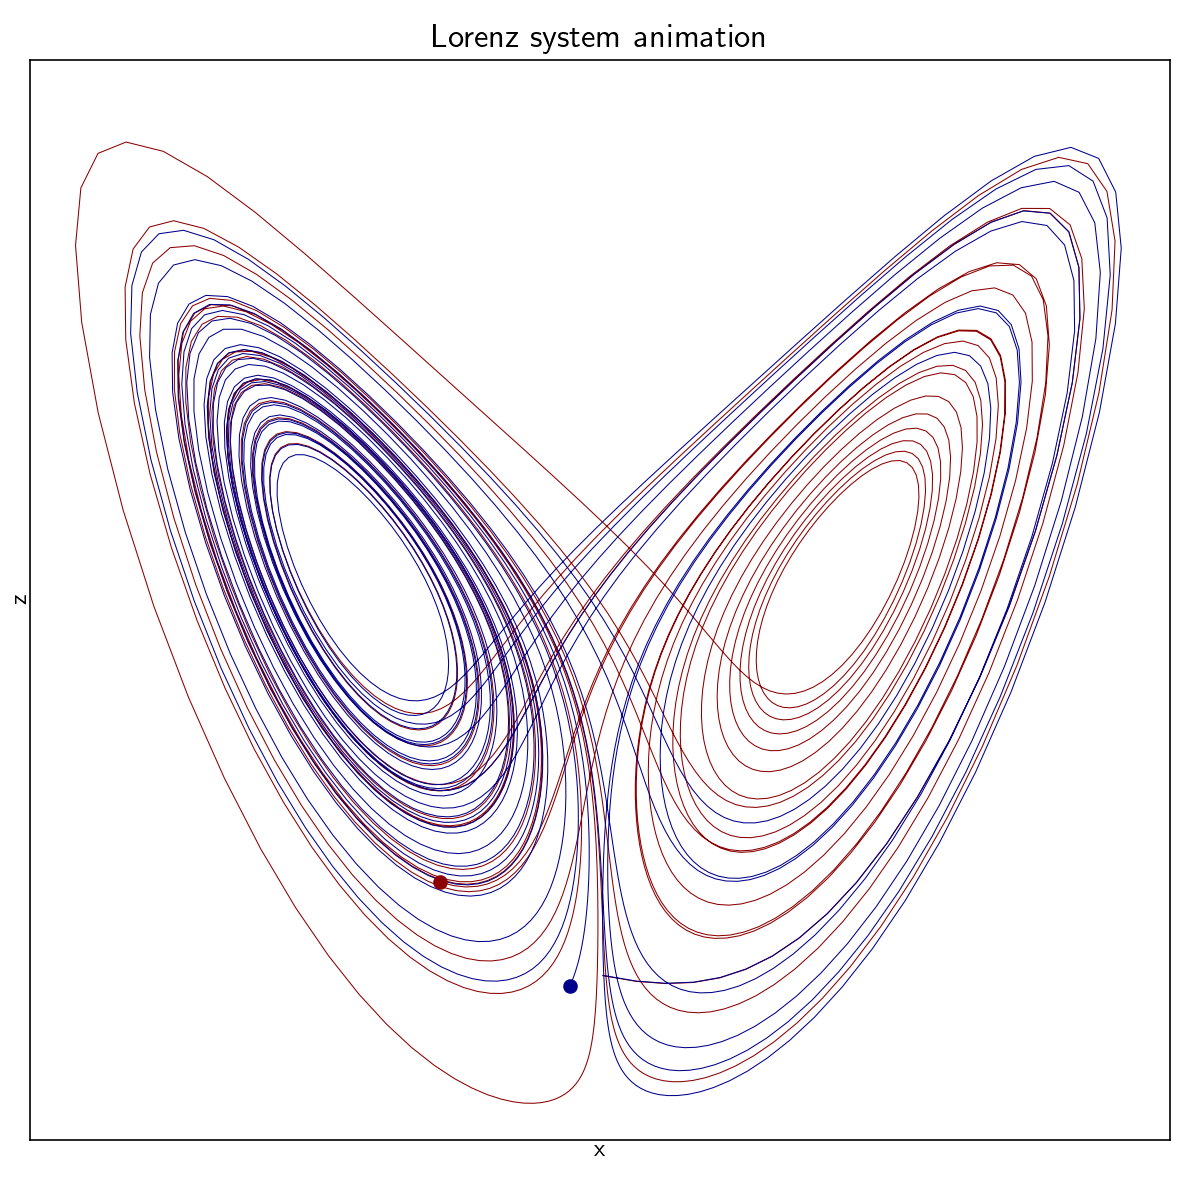

In [12]:
fig = plt.figure(figsize=(8,8))

# phase space
ps = fig.add_axes([0.025, 0.05, 0.95, 0.9])

ps1, = ps.plot([], [], lw=0.5, c="darkred")
ps2, = ps.plot([], [], lw=0.5, c="darkblue")
ps3, = ps.plot([], [], c="darkred", marker="o")
ps4, = ps.plot([], [], c="darkblue", marker="o")
ps.set_xticks([])
ps.set_yticks([])
ps.set_xlim(-20, 20)
ps.set_ylim(3, 49)
ps.set_xlabel("x", labelpad=-0.5, fontsize=12)
ps.set_ylabel("z", labelpad=-0.5, fontsize=12)
ps.set_title("Lorenz system animation", fontsize=16)

x1list = list()
z1list = list()

x2list = list()
z2list = list()

writer = PillowWriter(fps=50)

with writer.saving(fig, "lorenz.gif", 100):
    for i in range(T*N + 1):
        x1list.append(res1[0, i])
        z1list.append(res1[2, i])
        
        x2list.append(res2[0, i])
        z2list.append(res2[2, i])       
        
        ps1.set_data(x1list, z1list)
        ps2.set_data(x2list, z2list)
        ps3.set_data([x1list[-1]], [z1list[-1]])
        ps4.set_data([x2list[-1]], [z2list[-1]])
        
        writer.grab_frame()

If everything ran smoothly, you should now find a .gif file in your folder with an animated version of the butterfly figure. You can see that despite the extremely small difference in initial conditions, after some time the paths diverge completely and seem entirely unrelated.